# 六 数据加载、存储、文件格式
## 6.1 读取文本格数的数据
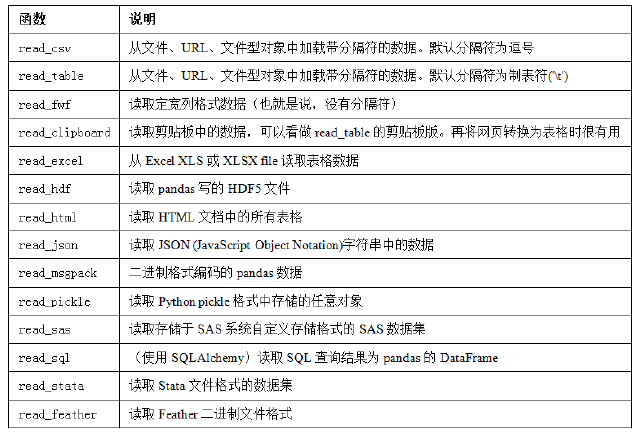

In [20]:
import pandas as pd
import numpy as np

In [4]:

fpath = r'C:\Users\Zelon\DataAnalysis8\StudentsPerformance.csv'
df = pd.read_csv(fpath,sep = ',')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#pd.read_table(fpath,sep = ',')
df_readtable = pd.read_table(fpath,sep = ',')
df_readtable.head()

C:\Users\Zelon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


read_csv/read_table函数的参数说明：
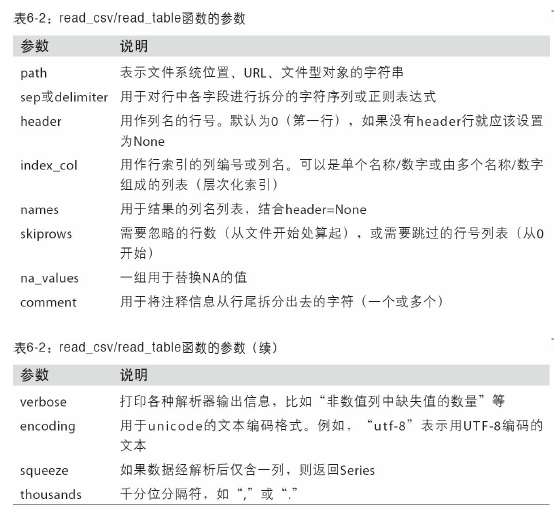

In [8]:
#逐块读取文本个数的数据
#只想读取文件的前20行
df_20 = pd.read_csv(fpath,nrows = 20)
df_20

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [29]:
# 读取前20行的被3整除的行
df_20_3 = pd.read_csv(fpath,nrows = int(20 / 3),skiprows=lambda x: x % 3 != 0)
df_20_3

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,master's degree,standard,none,90,95,93
1,female,group B,associate's degree,standard,none,71,83,78
2,male,group D,high school,free/reduced,completed,64,64,67
3,male,group D,associate's degree,standard,none,40,52,43
4,female,group A,master's degree,standard,none,50,53,58
5,female,group B,some high school,free/reduced,none,18,32,28


In [30]:
#将数据写出到文本格式
#将变量保存成txt文件，数据以单个空格代替原来的‘，’
df_20_3.to_csv(r'C:\Users\Zelon\DataAnalysis8\df_20_3.txt',sep = ' ')


### 处理分隔符格式
1、使用f=open()打开文件
2、使用python自带的csv模块，对不符合格式要求的文件，用lists = list(csv.reader(f)),转化为list
header,values = lists[0],lists[1:]
3、使用字典和zip函数，将数据转化为字典列：{h:v for h ,v in zip(header,zip(*values))}
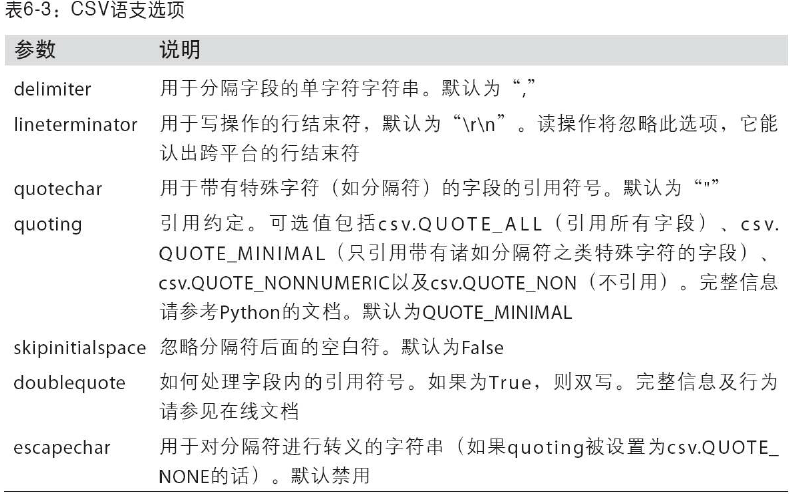

In [1]:
import csv
f = open('data_task3.csv')
reader = csv.reader(f)
for line in reader:
    print(line)

['x', 'y', 'z']
['3', '8', '2']
['90', '21', '33']
['12', '22', '13']


In [4]:
with open('data_task3.csv') as f:
    lines = list(csv.reader(f))
header,values = lines[0],lines[1:]
print(header)
print('------------')
print(values)

['x', 'y', 'z']
------------
[['3', '8', '2'], ['90', '21', '33'], ['12', '22', '13']]


In [5]:
data_dict = {h:v for h,v in zip(header,zip(*values))}
print(data_dict)

{'x': ('3', '90', '12'), 'y': ('8', '21', '22'), 'z': ('2', '33', '13')}


In [9]:
#新的CVS文件形式，通过定义csv.Dialect的一个子类，来定义。
f = open('data_task3.csv')
class my_dialect(csv.Dialect):
    lineterminator = '\n'
    delimiter = ';'
    quotechar = '"'
    quoting = csv.QUOTE_MINIMAL
reader = csv.reader(f,dialect = my_dialect)
for line in reader:
    print(line)

['x,y,z']
['3,8,2']
['90,21,33']
['12,22,13']


In [8]:
#或者不定义子类，使用delimiter参数来定义分隔符
f = open('data_task3.csv')
reader = csv.reader(f,delimiter = '|')
for line in reader:
    print(line)


['x,y,z']
['3,8,2']
['90,21,33']
['12,22,13']


In [14]:
f.close()
with open('data_task3.csv','w') as f:
    writer = csv.writer(f,dialect = my_dialect)
    writer.writerow(('one','two','three'))
    writer.writerow(('4','5','6'))
    writer.writerow(('1','2','3'))
f.close()

In [15]:
#JSON数据
obj = """
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
              {"name": "Katie", "age": 38,
               "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

In [16]:
obj

'\n{"name": "Wes",\n "places_lived": ["United States", "Spain", "Germany"],\n "pet": null,\n "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},\n              {"name": "Katie", "age": 38,\n               "pets": ["Sixes", "Stache", "Cisco"]}]\n}\n'

In [17]:
import json
result = json.loads(obj)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [18]:
asjson = json.dumps(result)
print(asjson)

{"name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null, "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]}, {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]}


In [21]:
siblings = pd.DataFrame(result['siblings'], columns=['name', 'age'])
siblings

,name,age
0,Scott,30
1,Katie,38


In [ ]:
#XML和HTML：web信息收集

In [23]:
tables = pd.read_html('data_task3.html')
print(len(tables))
failures = tables[0]
failures.head()

1


,0,1,2,3,4
0,序号,招聘岗位,招聘数量,学历及专业要求,工作 \t所在地
1,1,电网调控运行、输电运检、变电运检、城区配电、电力营销、送变电施工、技术支持与科学研究等,约80人,1.硕士研究生 \t2.电工类专业,国网重庆市电力公司范围内
2,2,电网调控运行、输电运检、变电运检、城区配电、电力营销、送变电施工、技术支持与科学研究等,约140人,1.大学本科 \t2.电工类专业,国网重庆市电力公司范围内


In [26]:
type(failures)
failures.index

RangeIndex(start=0, stop=3, step=1)

In [ ]:
#利用lxml.objectify解析XML


## 6.2 二进制数据格式

In [28]:
#pickle
f = pd.read_csv('StudentsPerformance.csv')
f.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
f.to_pickle('StudentsPerformance_pikle')

In [30]:
x = pd.read_pickle('StudentsPerformance_pikle')
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [32]:
#HDF5
frame = pd.DataFrame({'a': np.random.randn(100)})
frame.head()

,a
0,2.021007
1,0.080159
2,0.367892
3,-0.555956
4,-0.601903


In [34]:
store = pd.HDFStore('data_task3.h5')
store['obj1'] = frame
store['obj1_col'] = frame['a']
store

<class 'pandas.io.pytables.HDFStore'>
File path: data_task3.h5

In [36]:
store['obj1'].head()

,a
0,2.021007
1,0.080159
2,0.367892
3,-0.555956
4,-0.601903


In [44]:
store.put('obj2', frame, format='table')
store.select('obj2', where=['index >= 10 and index <= 15'])
store.close()

In [45]:
#读取Microsoft Excel文件  
xlsx = pd.ExcelFile('StudentsPerformance.xlsx')


In [48]:
data = pd.read_excel(xlsx, 'StudentsPerformance')

In [49]:
writer = pd.ExcelWriter('StudentsPerformance1.xlsx')


In [50]:
data.to_excel(writer,'Sheet10')

In [51]:
writer.save()

## 6.3 Web APIs交互

In [12]:
#requests库
import requests
url = 'https://github.com/FavioVazquez/ds-cheatsheets/issues/24'
resp = requests.get(url)


In [13]:
resp

<Response [200]>

In [14]:
data = resp.json()

JSONDecodeError: Expecting value: line 7 column 1 (char 6)

## 6.4 数据库交互

In [ ]:
import sqlite3


In [ ]:
query = """
CREATE TABLE test
(a VARCHAR(20),b VARCHAR(20),
c REAL, d INTGER);"""


In [ ]:
con = squlite3.connect('mydata.sqlite')

In [ ]:
con = execute(query)
con.commit()
data = [('aa','ge',1.2),
       ('sa','dd',3.2)]
stmt = "INSERT INTO test VALUES(?,?,?)"
con.executemany(stmt,data)